# Building a Linear Regression Model Using PyTorch

### We will start by importing PyTorch

In [140]:
import torch


### Generating data for our model

In [141]:
x = torch.arange(0, 1, 0.02)

In [142]:
x

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [143]:
len(x)

50

### From Pytorch, we will import nn which stands for neural networks and contains all the building blocks for neural networks. These building blocks are all subclasses and the base class is nn.Module. Later, we will see that our model will subclass nn.Module

In [144]:
from torch import nn

In [145]:
weight = 0.7
bias = 0.3

y = weight * x + bias

y

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
        0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
        0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
        0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
        0.9300, 0.9440, 0.9580, 0.9720, 0.9860])

In [146]:
len(y)

50

### Now that we have our data, we can split it into train and test data set. Since we only want to build our model and test it using the data, we will not use any validation set. We will split our data into 80% (0.8) for training and 20% (0.2) for testing.

In [147]:
train_size = int(0.8*len(x))
test_size = int(0.8*len(y))

print(train_size, test_size)

40 40


In [148]:
x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

print(len(x_train), len(y_train), len(x_test), len(y_test))

40 40 10 10


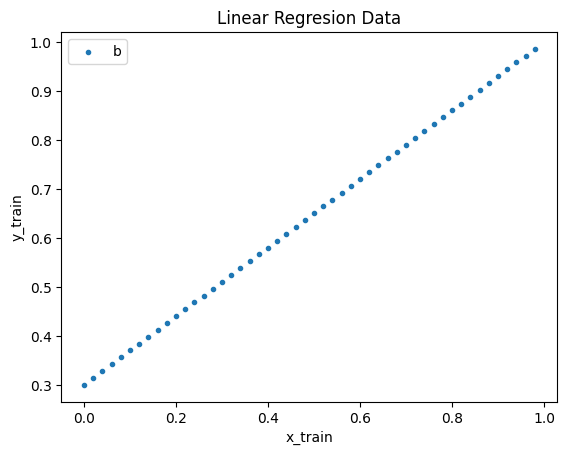

In [149]:
# Let's make a visualization of our data

import matplotlib.pyplot as plt

plt.scatter(x, y, label = "b", marker = ".")
plt.title("Linear Regresion Data")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.legend()

plt.show()

We will build our model by applying knowledge from object oriented programming.

In [150]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__() # this allows us inherit all the methods and attributes in nn.Module
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True)) # torch.Parameter provides the parameters that our model uses to make predictions. We have set it to start as random but by backpropagation and stepping the optimizer, we will later arrive at parameters that best represent our data, guiding our predictions
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float, requires_grad=True)) # requires_grad allows gradient tracking. This will be useful when we setup gradient descent, an algorithm that allows us update our parameters

  def forward(self, x: torch.Tensor) -> torch.Tensor:  # forward defines how our model does computation
    return self.weights * x + self.bias


### Now we have our model. We can train our model and see the predictions, then perform optimization if needed. It will most likely be needed since we are starting with random parameters. But we'll see



In [151]:
# In order to ensure tat nn.Parameter does not keep starting with new random values everytime we get an instance of our model, we will need to set manual seed
torch.manual_seed(42)
model = LinearRegressionModel() # Here, we are creating an instance of our model. This gives us access to all that is in the class and in the inherited classes

### Let's make predictions

In [152]:
model.train()

LinearRegressionModel()

In [153]:
# model training on train data
y_predicted = model(x_train)


In [154]:
# Let's see how good our model has performed by calculating the loss
# Since we are carrying out a linear regression, we will use the mean absolute errror which enables us find the differences between y_predicted and y_true

loss = nn.L1Loss()

In [155]:
model_loss = loss(y_predicted, y_train)
model_loss

tensor(0.3129, grad_fn=<MeanBackward0>)

In [156]:
def visual_progress(initial_x = x_train, initial_y = y_train, x=x_test, y = y_test, predictions = None):
  plt.scatter(x = initial_x, y = initial_y, label = "initial")
  plt.xlabel("Initial X")
  plt.ylabel("Initial Y")

  plt.scatter(x = x, y = y, label = "initial")
  plt.xlabel("Initial X")
  plt.ylabel("Initial Y")

  if predictions is not None:
    plt.scatter(x = x, y = predictions, label = "New data")
    plt.xlabel("Initial X")
    plt.ylabel("Initial Y")

  plt.legend()
  plt.show()

### Now that we've confirmed that our model works well, we can go on to train and test our model. But mos importantly, we can carry out more by incorporating backpropagation and gradient descent. Backpropagation tells our model the best way to optimize parameters

In [157]:
# For optimization, we will use the stochastic gradient descenct which is a gradient descent algorithm
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

 Epoch: 0, Train loss: 0.31288138031959534 | Test Loss: 0.48106518387794495


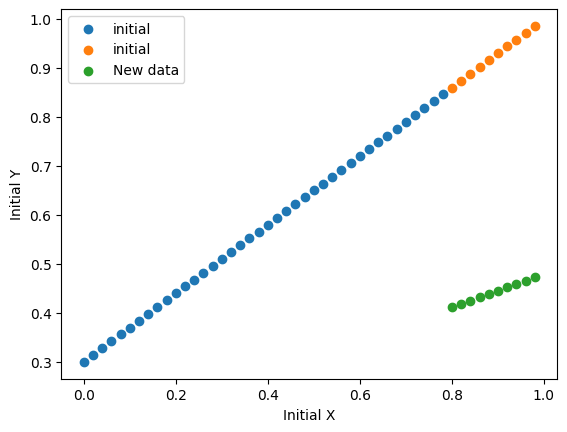

 Epoch: 50, Train loss: 0.04167863354086876 | Test Loss: 0.09919948130846024


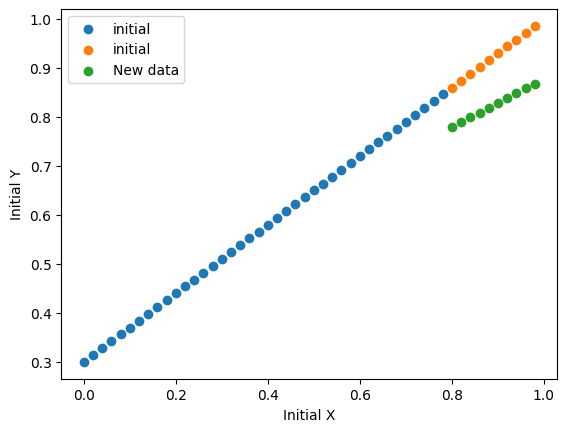

 Epoch: 100, Train loss: 0.024458957836031914 | Test Loss: 0.05646304413676262


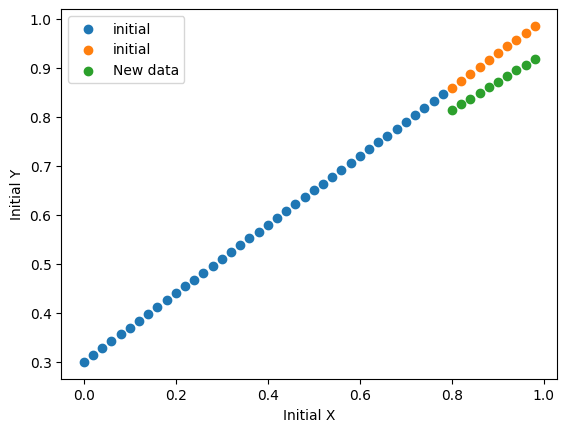

 Epoch: 150, Train loss: 0.0072835334576666355 | Test Loss: 0.016474086791276932


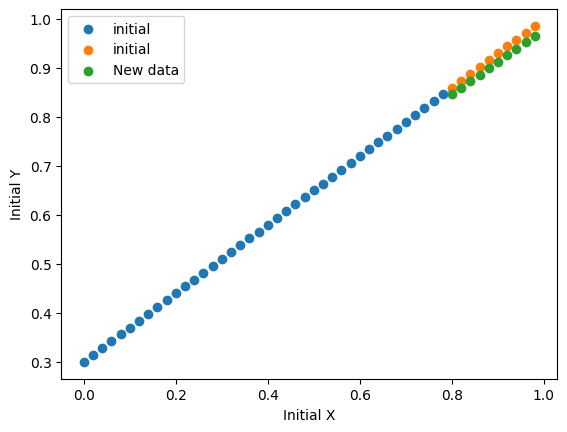

 Epoch: 200, Train loss: 0.008932482451200485 | Test Loss: 0.005023092031478882


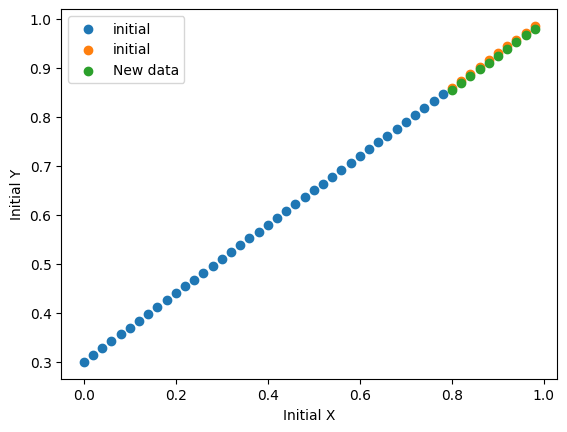

 Epoch: 250, Train loss: 0.008932482451200485 | Test Loss: 0.005023092031478882


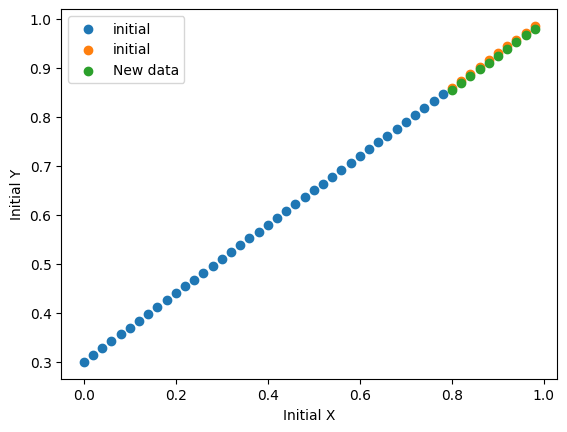

 Epoch: 300, Train loss: 0.008932482451200485 | Test Loss: 0.005023092031478882


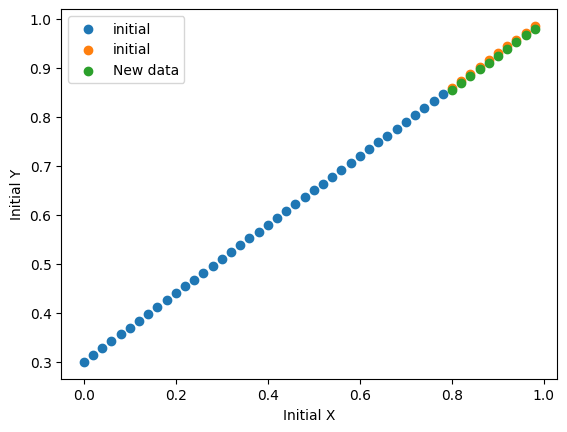

In [158]:
# epoch represent the numnber of forward passes through our data
epochs = 301

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # train model
  model.train()
  y_predicted = model(x_train)

  # calculate loss
  train_loss = loss(y_predicted, y_train)

  # zero the gradient so there is no accummulation of gradient
  optimizer.zero_grad()

  # back propagate
  train_loss.backward()

  # step the optimizer
  optimizer.step()

  # let's test our model for every epoch
  with torch.inference_mode():
    model.eval()

    y_test_predicted = model(x_test)

    # calculate the loss
    test_loss = loss(y_test_predicted, y_test)

  if epoch % 50 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(train_loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f" Epoch: {epoch}, Train loss: {train_loss} | Test Loss: {test_loss}")
    visual_progress(predictions = y_test_predicted)

Amazing!!! Isn't it?

### Let us plot the loss curves

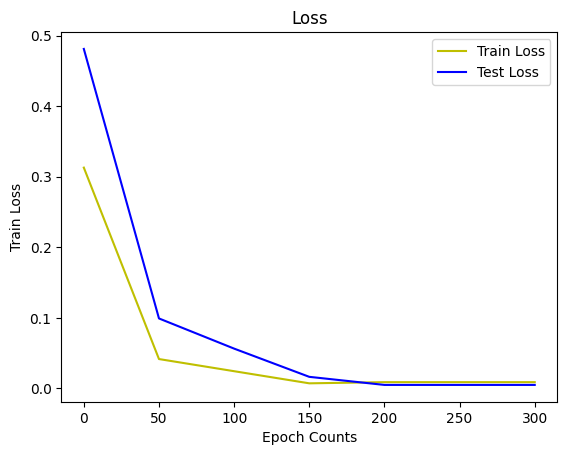

In [159]:
# show loss curves

plt.plot(epoch_count, train_loss_values, color="y", label="Train Loss")
plt.title("Loss")
plt.ylabel("Train Loss")
plt.xlabel("Epoch Counts")

plt.plot(epoch_count, test_loss_values, color="b", label="Test Loss")

plt.legend()
plt.show()

# Great. We have been able to build, train, and optimize our model!